# Download data for a functional layer of Spatial Signatures

This notebook downloads and prepares data for a functional layer of Spatial Signatures.

In [1]:
from download import download
import geopandas as gpd
import pandas as pd
import osmnx as ox
from tqdm import tqdm
from glob import glob
import rioxarray as ra
import pyproj
import zipfile
import tarfile
from shapely.geometry import box, mapping
import requests
import datetime

## Population estimates

Population estimates for England, Scotland and Wales. England is split into regions.

### ONS data

In [10]:
download('https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fpopulationandmigration%2fpopulationestimates%2fdatasets%2fcensusoutputareaestimatesinthesouthwestregionofengland%2fmid2019sape22dt10g/sape22dt10gmid2019southwest.zip',
        '../../urbangrammar_samba/functional_data/population_estimates/south_west_england', kind='zip')

Creating data folder...

file_sizes: 17.4MB [00:00, 72.8MB/s]                                            
Extracting zip file...
Successfully downloaded / unzipped to ../../urbangrammar_samba/functional_data/population_estimates/south_west_england


'../../urbangrammar_samba/functional_data/population_estimates/south_west_england'

In [11]:
download('https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fpopulationandmigration%2fpopulationestimates%2fdatasets%2fcensusoutputareaestimatesintheyorkshireandthehumberregionofengland%2fmid2019sape22dt10c/sape22dt10cmid2019yorkshireandthehumber.zip',
        '../../urbangrammar_samba/functional_data/population_estimates/yorkshire_humber_england', kind='zip')

Creating data folder...

file_sizes: 16.9MB [00:00, 72.4MB/s]                                            
Extracting zip file...
Successfully downloaded / unzipped to ../../urbangrammar_samba/functional_data/population_estimates/yorkshire_humber_england


'../../urbangrammar_samba/functional_data/population_estimates/yorkshire_humber_england'

In [13]:
download('https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fpopulationandmigration%2fpopulationestimates%2fdatasets%2fcensusoutputareaestimatesinthesoutheastregionofengland%2fmid2019sape22dt10i/sape22dt10imid2019southeast.zip',
        '../../urbangrammar_samba/functional_data/population_estimates/south_east_england', kind='zip')

Creating data folder...

file_sizes: 27.6MB [00:00, 71.8MB/s]                                            
Extracting zip file...
Successfully downloaded / unzipped to ../../urbangrammar_samba/functional_data/population_estimates/south_east_england


'../../urbangrammar_samba/functional_data/population_estimates/south_east_england'

In [14]:
download('https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fpopulationandmigration%2fpopulationestimates%2fdatasets%2fcensusoutputareaestimatesintheeastmidlandsregionofengland%2fmid2019sape22dt10f/sape22dt10fmid2019eastmidlands.zip',
        '../../urbangrammar_samba/functional_data/population_estimates/east_midlands_england', kind='zip')

Creating data folder...

file_sizes: 14.5MB [00:00, 104MB/s]                                             
Extracting zip file...
Successfully downloaded / unzipped to ../../urbangrammar_samba/functional_data/population_estimates/east_midlands_england


'../../urbangrammar_samba/functional_data/population_estimates/east_midlands_england'

In [22]:
download('https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fpopulationandmigration%2fpopulationestimates%2fdatasets%2fcensusoutputareaestimatesinthenorthwestregionofengland%2fmid2019sape22dt10b/sape22dt10bmid2019northwest.zip',
        '../../urbangrammar_samba/functional_data/population_estimates/north_west_england', kind='zip')

Creating data folder...

file_sizes: 23.0MB [00:00, 67.3MB/s]                                            
Extracting zip file...
Successfully downloaded / unzipped to ../../urbangrammar_samba/functional_data/population_estimates/north_west_england


'../../urbangrammar_samba/functional_data/population_estimates/north_west_england'

In [23]:
download('https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fpopulationandmigration%2fpopulationestimates%2fdatasets%2fcensusoutputareaestimatesintheeastregionofengland%2fmid2019sape22dt10h/sape22dt10hmid2019east.zip',
        '../../urbangrammar_samba/functional_data/population_estimates/east_england', kind='zip')

Creating data folder...

file_sizes: 18.8MB [00:00, 111MB/s]                                             
Extracting zip file...
Successfully downloaded / unzipped to ../../urbangrammar_samba/functional_data/population_estimates/east_england


'../../urbangrammar_samba/functional_data/population_estimates/east_england'

In [24]:
download('https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fpopulationandmigration%2fpopulationestimates%2fdatasets%2fcensusoutputareaestimatesinwales%2fmid2019sape22dt10j/sape22dt10jmid2019wales.zip',
        '../../urbangrammar_samba/functional_data/population_estimates/wales', kind='zip')

Creating data folder...

file_sizes: 9.60MB [00:00, 97.4MB/s]                                            
Extracting zip file...
Successfully downloaded / unzipped to ../../urbangrammar_samba/functional_data/population_estimates/wales


'../../urbangrammar_samba/functional_data/population_estimates/wales'

In [25]:
download('https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fpopulationandmigration%2fpopulationestimates%2fdatasets%2fcensusoutputareaestimatesinthenortheastregionofengland%2fmid2019sape22dt10d/sape22dt10dmid2019northeast.zip',
        '../../urbangrammar_samba/functional_data/population_estimates/north_east_england', kind='zip')

Creating data folder...

file_sizes: 8.39MB [00:00, 68.0MB/s]                                            
Extracting zip file...
Successfully downloaded / unzipped to ../../urbangrammar_samba/functional_data/population_estimates/north_east_england


'../../urbangrammar_samba/functional_data/population_estimates/north_east_england'

In [26]:
download('https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fpopulationandmigration%2fpopulationestimates%2fdatasets%2fcensusoutputareaestimatesinthewestmidlandsregionofengland%2fmid2019sape22dt10e/sape22dt10emid2019westmidlands.zip',
        '../../urbangrammar_samba/functional_data/population_estimates/west_midlands_england', kind='zip')

Creating data folder...

file_sizes: 17.7MB [00:00, 69.1MB/s]                                            
Extracting zip file...
Successfully downloaded / unzipped to ../../urbangrammar_samba/functional_data/population_estimates/west_midlands_england


'../../urbangrammar_samba/functional_data/population_estimates/west_midlands_england'

### Geometries

In [27]:
download('https://borders.ukdataservice.ac.uk/ukborders/easy_download/prebuilt/shape/England_oa_2011.zip', '../../urbangrammar_samba/functional_data/population_estimates/oa_geometry_england', kind='zip')

Creating data folder...

file_sizes: 100%|████████████████████████████| 407M/407M [00:08<00:00, 49.9MB/s]
Extracting zip file...
Successfully downloaded / unzipped to ../../urbangrammar_samba/functional_data/population_estimates/oa_geometry_england


'../../urbangrammar_samba/functional_data/population_estimates/oa_geometry_england'

In [28]:
download('https://borders.ukdataservice.ac.uk/ukborders/easy_download/prebuilt/shape/Wales_oac_2011.zip', '../../urbangrammar_samba/functional_data/population_estimates/oa_geometry_wales', kind='zip')

Creating data folder...

file_sizes: 100%|██████████████████████████| 31.4M/31.4M [00:00<00:00, 32.5MB/s]
Extracting zip file...
Successfully downloaded / unzipped to ../../urbangrammar_samba/functional_data/population_estimates/oa_geometry_wales


'../../urbangrammar_samba/functional_data/population_estimates/oa_geometry_wales'

### Data cleaning and processing

In [30]:
england = gpd.read_file('../../urbangrammar_samba/functional_data/population_estimates/oa_geometry_england/england_oa_2011.shp')

In [37]:
wales = gpd.read_file('../../urbangrammar_samba/functional_data/population_estimates/oa_geometry_wales/wales_oac_2011.shp')

In [40]:
oa = england.append(wales[['code', 'label', 'name', 'geometry']])

In [32]:
files = glob('../../urbangrammar_samba/functional_data/population_estimates/*/*.xlsx', recursive=True)

In [33]:
%time merged = pd.concat([pd.read_excel(f, sheet_name='Mid-2019 Persons', header=0, skiprows=4) for f in files])

CPU times: user 12min 2s, sys: 640 ms, total: 12min 2s
Wall time: 12min 5s


In [43]:
population_est = oa.merge(merged, left_on='code', right_on='OA11CD', how='left')

### Add Scotland

Scottish data are shipped differently.

#### Data

In [47]:
download('http://statistics.gov.scot/downloads/file?id=438c9dc6-dca0-48d5-995c-e3bb1d34e29e%2FSAPE_2011DZ_2001-2019_Five_and_broad_age_groups.zip', '../../urbangrammar_samba/functional_data/population_estimates/scotland', kind='zip')

Creating data folder...

file_sizes: 100%|██████████████████████████| 37.5M/37.5M [00:02<00:00, 14.0MB/s]
Extracting zip file...
Successfully downloaded / unzipped to ../../urbangrammar_samba/functional_data/population_estimates/scotland


'../../urbangrammar_samba/functional_data/population_estimates/scotland'

In [48]:
pop_scot = pd.read_csv('../../urbangrammar_samba/functional_data/population_estimates/scotland/data - statistics.gov.scot - SAPE_2011DZ_2019_Five.csv')

In [53]:
pop_scot = pop_scot[pop_scot.Sex == 'All']

In [56]:
counts = pop_scot[['GeographyCode', 'Value']].groupby('GeographyCode').sum()

#### Geometry

In [58]:
download('http://sedsh127.sedsh.gov.uk/Atom_data/ScotGov/ZippedShapefiles/SG_DataZoneBdry_2011.zip', '../../urbangrammar_samba/functional_data/population_estimates/dz_geometry_scotland', kind='zip')

Creating data folder...

file_sizes: 100%|██████████████████████████| 19.1M/19.1M [00:06<00:00, 3.05MB/s]
Extracting zip file...
Successfully downloaded / unzipped to ../../urbangrammar_samba/functional_data/population_estimates/dz_geometry_scotland


'../../urbangrammar_samba/functional_data/population_estimates/dz_geometry_scotland'

In [59]:
data_zones = gpd.read_file('../../urbangrammar_samba/functional_data/population_estimates/dz_geometry_scotland')

In [64]:
scotland = data_zones.merge(counts, left_on='DataZone', right_index=True)

In [67]:
scotland = scotland[['DataZone', 'Value', 'geometry']].rename(columns={'DataZone': 'code', 'Value': 'population'})

In [70]:
population_est = population_est[['code', 'All Ages', 'geometry']].rename(columns={'All Ages': 'population'}).append(scotland)

In [74]:
population_est.to_parquet('../../urbangrammar_samba/functional_data/population_estimates/gb_population_estimates.pq')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  """Entry point for launching an IPython kernel.


## WorldPop

Data is dowloaded clipped to GB, so we only have to reproject to OSGB.

In [79]:
download('ftp://ftp.worldpop.org.uk/GIS/Population/Global_2000_2020_Constrained/2020/BSGM/GBR/gbr_ppp_2020_constrained.tif', '../../urbangrammar_samba/functional_data/population_estimates/world_pop/gbr_ppp_2020_constrained.tif')


file_sizes: 100%|██████████████████████████| 34.3M/34.3M [00:01<00:00, 19.2MB/s]
Successfully downloaded file to ../../urbangrammar_samba/functional_data/population_estimates/world_pop/gbr_ppp_2020_constrained.tif


'../../urbangrammar_samba/functional_data/population_estimates/world_pop/gbr_ppp_2020_constrained.tif'

### Reproject to OSGB

In [9]:
wp = ra.open_rasterio("../../urbangrammar_samba/functional_data/population_estimates/world_pop/gbr_ppp_2020_constrained.tif")
wp.rio.crs

CRS.from_epsg(4326)

In [15]:
%time wp_osgb = wp.rio.reproject(pyproj.CRS(27700).to_wkt())

CPU times: user 8.28 s, sys: 896 ms, total: 9.17 s
Wall time: 9.18 s


In [16]:
wp_osgb.rio.crs

CRS.from_epsg(27700)

In [20]:
wp_osgb.rio.to_raster("../../urbangrammar_samba/functional_data/population_estimates/world_pop/gbr_ppp_2020_constrained_osgb.tif")

## POIs
### Geolytix retail

Geolytix retail POIs: https://drive.google.com/u/0/uc?id=1B8M7m86rQg2sx2TsHhFa2d-x-dZ1DbSy (no idea how to get them programatically, so they were downloaded manually)

In [27]:
geolytix = pd.read_csv('../../urbangrammar_samba/functional_data/pois/GEOLYTIX - RetailPoints/geolytix_retailpoints_v17_202008.csv')
geolytix.head(2)

,id,retailer,fascia,store_name,add_one,add_two,town,suburb,postcode,long_wgs,lat_wgs,bng_e,bng_n,pqi,open_date,size_band,geom_p_4326,geom_p_27700
0,1010015805,The Southern Co-operative,The Co-operative Food PFS,Co-op Lavant Road Chichester,Unit 2 Summersdale Retail Park,Lavant Road,Chichester,Summersdale,PO19 5RD,-0.784194,50.859193,485668.1622,107335.2522,Rooftop geocoded by Geolytix,NaN,"< 3,013 ft2 (280m2)",0101000020E6100000B52C23D51D18E9BF761C8509FA6D...,0101000020346C0000849822A690A41D4126241B097434...
1,1010014166,Marks and Spencer,Marks and Spencer BP,M&S Colchester Eastwood BP,Ipswich Road,NaN,Colchester,Highwoods,CO4 0EU,0.923960,51.906927,601229.3812,227194.2254,Rooftop geocoded by Geolytix,NaN,"< 3,013 ft2 (280m2)",0101000020E6100000F09B5AF81391ED3FCF1F012C16F4...,0101000020346C0000DCFE2FC31A5922418A6885CDD1BB...


We already have coordinates in OSGB, no need to preprocess.

### Listed buildings

We have to merge English, Scottish and Welsh data.

England downloaded manually from https://services.historicengland.org.uk/NMRDataDownload/OpenPages/Download.aspx

In [95]:
download('https://inspire.hes.scot/AtomService/DATA/lb_scotland.zip', '../../urbangrammar_samba/functional_data/pois/listed_buildings/scotland', kind='zip')

Creating data folder...

file_sizes: 100%|██████████████████████████| 6.41M/6.41M [00:01<00:00, 3.43MB/s]
Extracting zip file...
Successfully downloaded / unzipped to ../../urbangrammar_samba/functional_data/pois/listed_buildings/scotland


'../../urbangrammar_samba/functional_data/pois/listed_buildings/scotland'

In [96]:
download('http://lle.gov.wales/catalogue/item/ListedBuildings.zip', '../../urbangrammar_samba/functional_data/pois/listed_buildings/wales', kind='zip')

Creating data folder...

file_sizes: 100%|██████████████████████████| 2.57M/2.57M [00:00<00:00, 13.3MB/s]
Extracting zip file...
Successfully downloaded / unzipped to ../../urbangrammar_samba/functional_data/pois/listed_buildings/wales


'../../urbangrammar_samba/functional_data/pois/listed_buildings/wales'

#### Processing

In [29]:
with zipfile.ZipFile("../../urbangrammar_samba/functional_data/pois/listed_buildings/Listed Buildings.zip", 'r') as zip_ref:
    zip_ref.extractall("../../urbangrammar_samba/functional_data/pois/listed_buildings/england")

In [31]:
england = gpd.read_file('../../urbangrammar_samba/functional_data/pois/listed_buildings/england/ListedBuildings_23Oct2020.shp')

In [33]:
england.head(2)

,ListEntry,Name,Location,Grade,ListDate,AmendDate,LegacyUID,NGR,CaptureSca,Easting,Northing,Hyperlink,geometry
0,1021466,20 AND 20A,"Corsley, Wiltshire, BA12",II,1987-11-05,None,313736,ST8338544428,1:2500,383389.03,144430.4185,https://historicengland.org.uk/listing/the-lis...,POINT (383389.030 144430.419)
1,1021467,TENNIS CORNER FARMHOUSE WITH GRANARY AND STABLE,"Dilton Marsh, Wiltshire, BA11",II,1987-11-05,None,313738,ST 82839 50851,1:2500,382839.00,150851.3608,https://historicengland.org.uk/listing/the-lis...,POINT (382839.000 150851.361)


In [34]:
scotland = gpd.read_file('../../urbangrammar_samba/functional_data/pois/listed_buildings/scotland/Listed_Buildings.shp')

In [35]:
scotland.head(2)

,ENT_REF,ENT_SEQ,ENT_TITLE,ACCURACY,X,Y,CREATED,COMPILER,UPDATED,PRECISION,...,AMENDED,LINK,LEGISLATIO,CATEGORY,GROUPCAT,CLASS,LOCAL_AUTH,NAT_PARK,PARBUR,geometry
0,330184.0,1.0,Ayton Manse,Location Digitised on OS MasterMap,392542.0,660715.0,2003-01-01,Historic Environment Scotland,None,Within 10m,...,None,http://portal.historicenvironment.scot/designa...,http://www.legislation.gov.uk/ukpga/1997/9,C,None,Cultural,Scottish Borders,None,Ayton,POINT (392542.000 660715.000)
1,330186.0,2.0,"Railway Bridge, Ayton",Location Digitised on OS MasterMap,392330.0,659774.0,2003-01-01,Historic Environment Scotland,None,Within 10m,...,None,http://portal.historicenvironment.scot/designa...,http://www.legislation.gov.uk/ukpga/1997/9,C,None,Cultural,Scottish Borders,None,Ayton,POINT (392330.000 659774.000)


In [36]:
wales = gpd.read_file('../../urbangrammar_samba/functional_data/pois/listed_buildings/wales/Cadw_ListedBuildingsMPoint.shp')

In [37]:
wales.head(2)

,RecordNumb,Name,Name_cy,Designatio,Grade,Location,BroadClass,BroadClas0,Report,geometry
0,1,Kelsterton Hall,None,1949-08-08,II,Set back slightly from the road at the junctio...,Recreational,Hamdden,http://cadwpublic-api.azurewebsites.net/report...,MULTIPOINT (327836.000 370714.000)
1,2,Plas Bellin,None,1962-01-21,II,"To W of road, approximately 900m N of crossroa...",Domestic,Domestig,http://cadwpublic-api.azurewebsites.net/report...,MULTIPOINT (326364.000 369400.000)


In [44]:
listed = pd.concat([england[['geometry']], scotland[['geometry']], wales[['geometry']]])
listed.reset_index(drop=True).to_parquet("../../urbangrammar_samba/functional_data/pois/listed_buildings/listed_buildings_gb.pq")

<ipython-input-44-77ad3d860075>:2: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  listed.reset_index(drop=True).to_parquet("../../urbangrammar_samba/functional_data/pois/listed_buildings/listed_buildings_gb.pq")


## Night lights

We need to clip it to the extent of GB (dataset has a global coverage) and reproject to OSGB.

In [20]:
with open('../../urbangrammar_samba/functional_data/employment/SVDNB_npp_20190301-20190331_75N060W_vcmcfg_v10_c201904071900.tgz', "wb") as down:
    down.write(requests.get('https://data.ngdc.noaa.gov/instruments/remote-sensing/passive/spectrometers-radiometers/imaging/viirs/dnb_composites/v10//201903/vcmcfg/SVDNB_npp_20190301-20190331_75N060W_vcmcfg_v10_c201904071900.tgz').content)
    down.close()

In [22]:
with tarfile.open('../../urbangrammar_samba/functional_data/employment/SVDNB_npp_20190301-20190331_75N060W_vcmcfg_v10_c201904071900.tgz', 'r') as zip_ref:
    zip_ref.extractall("../../urbangrammar_samba/functional_data/employment")

### Clip and reproject

In [23]:
nl = ra.open_rasterio('../../urbangrammar_samba/functional_data/employment/SVDNB_npp_20190301-20190331_75N060W_vcmcfg_v10_c201904071900.avg_rade9h.tif')

In [24]:
nl.rio.crs

CRS.from_epsg(4326)

In [2]:
extent = gpd.read_parquet("../../urbangrammar_samba/spatial_signatures/local_auth_chunks.pq")

In [3]:
extent = extent.to_crs(4326)

In [25]:
%time nl_clipped = nl.rio.clip([mapping(box(*extent.total_bounds))], all_touched=True)

CPU times: user 3.96 s, sys: 6.95 s, total: 10.9 s
Wall time: 29.5 s


In [27]:
%time nl_osgb = nl_clipped.rio.reproject(pyproj.CRS(27700).to_wkt())

CPU times: user 766 ms, sys: 50.2 ms, total: 816 ms
Wall time: 816 ms


In [32]:
nl_osgb.rio.to_raster("../../urbangrammar_samba/functional_data/employment/night_lights_osgb.tif")

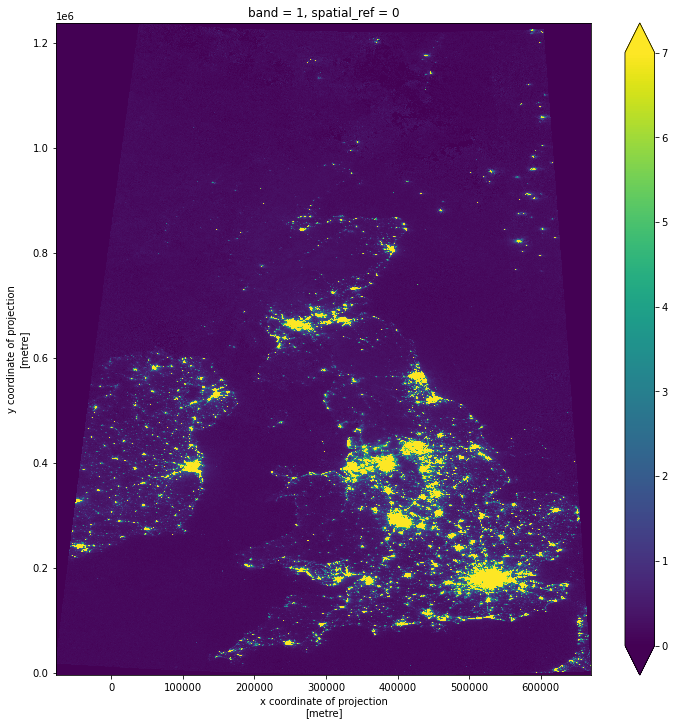

In [31]:
nl_osgb.plot(figsize=(12, 12), vmin=0, vmax=7)

## Postcodes

Keeping only active postcodes, relevant columns and determining their age.

In [103]:
download('https://www.arcgis.com/sharing/rest/content/items/b6e6715fa1984648b5e690b6a8519e53/data', '../../urbangrammar_samba/functional_data/postcode/nhspd', kind='zip')

Creating data folder...

file_sizes: 100%|████████████████████████████| 110M/110M [00:04<00:00, 24.2MB/s]
Extracting zip file...
Successfully downloaded / unzipped to ../../urbangrammar_samba/functional_data/postcode/nhspd


'../../urbangrammar_samba/functional_data/postcode/nhspd'

In [37]:
postcodes = pd.read_csv("../../urbangrammar_samba/functional_data/postcode/nhspd/Data/nhg20aug.csv", header=None)

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7,10,11,17,20,26,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [40]:
postcodes = postcodes.iloc[:, :6]
existing = postcodes[postcodes[3].isna()]
located = existing[existing[4].notna()]
located = located.rename(columns={0: 'postcode', 1: 'postcode2', 2:'introduced', 3:'terminated', 4:'x', 5:'y'})
located.introduced = pd.to_datetime(located.introduced, format="%Y%m")
located['age'] = (pd.to_datetime('today') - located.introduced).dt.days
located.drop(columns=['postcode2', 'terminated']).to_parquet('../../urbangrammar_samba/functional_data/postcode/postcodes_gb.pq')

## Food hygiene rating scheme

FHRS https://data.cdrc.ac.uk/dataset/food-hygiene-rating-scheme-fhrs-ratings (requires login)

In [72]:
fhrs = pd.read_csv('../../urbangrammar_samba/functional_data/fhrs/Data/fhrs_location_20200528.csv')

In [73]:
fhrs

,BusinessID,latitude,longitude,bng_east,bng_north,utm29_east,utm29_north,utm30_east,utm30_north,utm31_east,utm31_north,utm_zone,date_created,date_updated
0,1,51.840311,-0.634672,494159.3436,216625.1394,1.075836e+06,5776434.811,662947.2937,5745922.713,662947.2937,5745922.713,30.0,2012-11-22,NaN
1,2,51.914273,-1.054004,465163.7254,224393.1735,1.046116e+06,5781394.193,633842.5939,5753292.773,633842.5939,5753292.773,30.0,2012-11-22,NaN
2,3,0.000000,0.000000,0.0000,0.0000,0.000000e+00,0.000,0.0000,0.000,0.0000,0.000,NaN,2012-11-22,NaN
3,4,51.762521,-0.744901,486714.3979,207837.3419,1.069245e+06,5766934.601,655622.2705,5737031.704,655622.2705,5737031.704,30.0,2012-11-22,2018-12-26
4,5,51.795047,-0.716069,488640.4326,211489.2210,1.070818e+06,5770769.654,657498.3679,5740710.457,657498.3679,5740710.457,30.0,2012-11-22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5122160,883771,0.000000,0.000000,0.0000,0.0000,0.000000e+00,0.000,0.0000,0.000,0.0000,0.000,NaN,2020-05-01,NaN
5122161,1014862,52.633659,-1.130756,458925.5825,304342.1474,1.032123e+06,5860641.674,626498.9755,5833159.625,626498.9755,5833159.625,30.0,2020-04-30,NaN
5122162,1014863,52.646938,-1.075170,462668.4778,305866.0147,1.035712e+06,5862528.654,630220.8779,5834735.509,630220.8779,5834735.509,30.0,2020-04-30,NaN
5122163,1014864,55.761562,-4.696288,230919.6035,655316.2701,7.699701e+05,6187931.219,393561.5047,6180845.309,393561.5047,6180845.309,30.0,2020-04-25,NaN


No need to preprocess at the moment. Contains OSGB coordinates for each point.

## Business census

https://data.cdrc.ac.uk/dataset/business-census (requires login)
`encoding = "ISO-8859-1"`

- get gemetries
    - either geocode addresses (could be expensive
    - or link to postcode points

## Workplace density

Dowload workplace population data from scottish census and english census, combine together and link to geometry.

In [2]:
download('http://www.scotlandscensus.gov.uk/documents/additional_tables/WP605SCwz.csv', '../../urbangrammar_samba/functional_data/employment/workplace/scotland_industry.csv')


file_sizes: 100%|████████████████████████████| 239k/239k [00:00<00:00, 2.47MB/s]
Successfully downloaded file to ../../urbangrammar_samba/functional_data/employment/workplace/scotland_industry.csv


'../../urbangrammar_samba/functional_data/employment/workplace/scotland_industry.csv'

In [5]:
download('https://www.nomisweb.co.uk/api/v01/dataset/nm_1314_1.bulk.csv?time=latest&measures=20100&geography=TYPE262', '../../urbangrammar_samba/functional_data/employment/workplace/england_wales_industry.csv', timeout=60)


file_sizes: 100%|██████████████████████████| 5.35M/5.35M [00:00<00:00, 7.41MB/s]
Successfully downloaded file to ../../urbangrammar_samba/functional_data/employment/workplace/england_wales_industry.csv


'../../urbangrammar_samba/functional_data/employment/workplace/england_wales_industry.csv'

In [7]:
download('https://www.nomisweb.co.uk/api/v01/dataset/nm_1300_1.bulk.csv?time=latest&measures=20100&geography=2013265922TYPE299', '../../urbangrammar_samba/functional_data/employment/workplace/north_west.csv')


file_sizes: 100%|████████████████████████████| 799k/799k [00:00<00:00, 6.92MB/s]
Successfully downloaded file to ../../urbangrammar_samba/functional_data/employment/workplace/north_west.csv


'../../urbangrammar_samba/functional_data/employment/workplace/north_west.csv'

In [14]:
download('https://www.nomisweb.co.uk/api/v01/dataset/nm_1300_1.bulk.csv?time=latest&measures=20100&geography=2013265926TYPE299', '../../urbangrammar_samba/functional_data/employment/workplace/east.csv')


file_sizes: 100%|████████████████████████████| 651k/651k [00:00<00:00, 6.86MB/s]
Successfully downloaded file to ../../urbangrammar_samba/functional_data/employment/workplace/east.csv


'../../urbangrammar_samba/functional_data/employment/workplace/east.csv'

In [15]:
download('https://www.nomisweb.co.uk/api/v01/dataset/nm_1300_1.bulk.csv?time=latest&measures=20100&geography=2013265924TYPE299', '../../urbangrammar_samba/functional_data/employment/workplace/east_midlands.csv')


file_sizes: 100%|████████████████████████████| 504k/504k [00:00<00:00, 6.91MB/s]
Successfully downloaded file to ../../urbangrammar_samba/functional_data/employment/workplace/east_midlands.csv


'../../urbangrammar_samba/functional_data/employment/workplace/east_midlands.csv'

In [16]:
download('https://www.nomisweb.co.uk/api/v01/dataset/nm_1300_1.bulk.csv?time=latest&measures=20100&geography=2013265927TYPE299', '../../urbangrammar_samba/functional_data/employment/workplace/london.csv')


file_sizes: 100%|████████████████████████████| 859k/859k [00:00<00:00, 6.74MB/s]
Successfully downloaded file to ../../urbangrammar_samba/functional_data/employment/workplace/london.csv


'../../urbangrammar_samba/functional_data/employment/workplace/london.csv'

In [17]:
download('https://www.nomisweb.co.uk/api/v01/dataset/nm_1300_1.bulk.csv?time=latest&measures=20100&geography=2013265921TYPE299', '../../urbangrammar_samba/functional_data/employment/workplace/north_east.csv')


file_sizes: 100%|████████████████████████████| 301k/301k [00:00<00:00, 5.98MB/s]
Successfully downloaded file to ../../urbangrammar_samba/functional_data/employment/workplace/north_east.csv


'../../urbangrammar_samba/functional_data/employment/workplace/north_east.csv'

In [20]:
download('https://www.nomisweb.co.uk/api/v01/dataset/nm_1300_1.bulk.csv?time=latest&measures=20100&geography=2013265928TYPE299', '../../urbangrammar_samba/functional_data/employment/workplace/south_east.csv', timeout=30)


file_sizes: 100%|████████████████████████████| 948k/948k [00:00<00:00, 7.44MB/s]
Successfully downloaded file to ../../urbangrammar_samba/functional_data/employment/workplace/south_east.csv


'../../urbangrammar_samba/functional_data/employment/workplace/south_east.csv'

In [21]:
download('https://www.nomisweb.co.uk/api/v01/dataset/nm_1300_1.bulk.csv?time=latest&measures=20100&geography=2013265929TYPE299', '../../urbangrammar_samba/functional_data/employment/workplace/south_west.csv')


file_sizes: 100%|████████████████████████████| 605k/605k [00:00<00:00, 7.05MB/s]
Successfully downloaded file to ../../urbangrammar_samba/functional_data/employment/workplace/south_west.csv


'../../urbangrammar_samba/functional_data/employment/workplace/south_west.csv'

In [22]:
download('https://www.nomisweb.co.uk/api/v01/dataset/nm_1300_1.bulk.csv?time=latest&measures=20100&geography=2013265925TYPE299', '../../urbangrammar_samba/functional_data/employment/workplace/west_midlands.csv')


file_sizes: 100%|████████████████████████████| 614k/614k [00:00<00:00, 6.14MB/s]
Successfully downloaded file to ../../urbangrammar_samba/functional_data/employment/workplace/west_midlands.csv


'../../urbangrammar_samba/functional_data/employment/workplace/west_midlands.csv'

In [23]:
download('https://www.nomisweb.co.uk/api/v01/dataset/nm_1300_1.bulk.csv?time=latest&measures=20100&geography=2013265923TYPE299', '../../urbangrammar_samba/functional_data/employment/workplace/yorkshire.csv')


file_sizes: 100%|████████████████████████████| 592k/592k [00:00<00:00, 6.67MB/s]
Successfully downloaded file to ../../urbangrammar_samba/functional_data/employment/workplace/yorkshire.csv


'../../urbangrammar_samba/functional_data/employment/workplace/yorkshire.csv'

In [40]:
download('https://www.nrscotland.gov.uk/files/geography/output-area-2011-mhw.zip', '../../urbangrammar_samba/functional_data/employment/workplace/scotland_oa', kind='zip')

Creating data folder...

file_sizes: 100%|██████████████████████████| 32.7M/32.7M [00:00<00:00, 65.3MB/s]
Extracting zip file...
Successfully downloaded / unzipped to ../../urbangrammar_samba/functional_data/employment/workplace/scotland_oa


'../../urbangrammar_samba/functional_data/employment/workplace/scotland_oa'

In [45]:
download('https://www.nomisweb.co.uk/api/v01/dataset/nm_155_1.bulk.csv?time=latest&measures=20100&geography=TYPE262', '../../urbangrammar_samba/functional_data/employment/workplace/wp_density_ew.csv', timeout=30)


file_sizes: 100%|██████████████████████████| 2.46M/2.46M [00:00<00:00, 7.66MB/s]
Successfully downloaded file to ../../urbangrammar_samba/functional_data/employment/workplace/wp_density_ew.csv


'../../urbangrammar_samba/functional_data/employment/workplace/wp_density_ew.csv'

In [46]:
download('https://www.nrscotland.gov.uk/files//geography/products/workplacezones2011scotland.zip', '../../urbangrammar_samba/functional_data/employment/workplace/wpz_scotland', kind='zip')

Creating data folder...

file_sizes: 100%|██████████████████████████| 15.4M/15.4M [00:00<00:00, 39.3MB/s]
Extracting zip file...
Successfully downloaded / unzipped to ../../urbangrammar_samba/functional_data/employment/workplace/wpz_scotland


'../../urbangrammar_samba/functional_data/employment/workplace/wpz_scotland'

In [54]:
download('http://www.scotlandscensus.gov.uk/documents/additional_tables/WP102SCca.csv', '../../urbangrammar_samba/functional_data/employment/workplace/wp_density_scotland.csv')


file_sizes: 100%|███████████████████████████| 2.79k/2.79k [00:00<00:00, 184kB/s]
Successfully downloaded file to ../../urbangrammar_samba/functional_data/employment/workplace/wp_density_scotland.csv


'../../urbangrammar_samba/functional_data/employment/workplace/wp_density_scotland.csv'

In [91]:
download('http://www.scotlandscensus.gov.uk/documents/additional_tables/WP103SCwz.csv', '../../urbangrammar_samba/functional_data/employment/workplace/wp_pop_scotland.csv')


file_sizes: 100%|████████████████████████████| 473k/473k [00:00<00:00, 4.64MB/s]
Successfully downloaded file to ../../urbangrammar_samba/functional_data/employment/workplace/wp_pop_scotland.csv


'../../urbangrammar_samba/functional_data/employment/workplace/wp_pop_scotland.csv'

In [83]:
with zipfile.ZipFile("../../urbangrammar_samba/functional_data/employment/workplace/wz2011ukbgcv2.zip", 'r') as zip_ref:
    zip_ref.extractall("../../urbangrammar_samba/functional_data/employment/workplace/")

In [28]:
wpz_geom = gpd.read_file('../../urbangrammar_samba/functional_data/employment/workplace/WZ_2011_UK_BGC_V2.shp')

In [90]:
wpz_geom

,WZ11CD,LAD_DCACD,LAD11NM,LAD11NMW,BNG_E,BNG_N,LONG,LAT,geometry
0,E33000001,E08000020,Gateshead,None,426394,563614,-1.58929,54.96646,"POLYGON ((426363.000 563750.000, 426477.836 56..."
1,E33000002,E08000020,Gateshead,None,426186,563095,-1.59258,54.96181,"POLYGON ((426497.000 563046.000, 426487.000 56..."
2,E33000003,E08000020,Gateshead,None,426570,563542,-1.58654,54.96580,"POLYGON ((426786.032 563536.860, 426602.875 56..."
3,E33000004,E08000020,Gateshead,None,426828,563212,-1.58254,54.96283,"POLYGON ((427052.405 563318.499, 427011.334 56..."
4,E33000005,E08000020,Gateshead,None,425707,562777,-1.60009,54.95897,"POLYGON ((425818.791 562796.341, 425806.657 56..."
...,...,...,...,...,...,...,...,...,...
60704,W35002706,W06000015,Cardiff,Caerdydd,318509,175037,-3.17457,51.46841,"POLYGON ((318762.325 174960.625, 318647.719 17..."
60705,W35002707,W06000015,Cardiff,Caerdydd,318854,174831,-3.16956,51.46660,"POLYGON ((319066.795 174842.341, 319078.000 17..."
60706,W35002708,W06000015,Cardiff,Caerdydd,318930,175713,-3.16867,51.47454,"POLYGON ((319154.263 175562.432, 319108.261 17..."
60707,W35002709,W06000015,Cardiff,Caerdydd,318822,175200,-3.17011,51.46992,"POLYGON ((318768.685 175656.549, 319035.000 17..."


In [87]:
wpz_ew = pd.read_csv("../../urbangrammar_samba/functional_data/employment/workplace/wp_density_ew.csv")

In [88]:
wpz_ew

,date,geography,geography code,Area/Population Density: All usual residents; measures: Value,Area/Population Density: Area Hectares; measures: Value,Area/Population Density: Density (number of persons per hectare); measures: Value
0,2011,E33000439,E33000439,687,68.41,10.0
1,2011,E33000440,E33000440,361,50.77,7.1
2,2011,E33000441,E33000441,462,11.28,41.0
3,2011,E33000454,E33000454,772,1147.22,0.7
4,2011,E33000455,E33000455,3278,5.81,564.2
...,...,...,...,...,...,...
53573,2011,W35002465,W35002465,239,1784.50,0.1
53574,2011,W35002466,W35002466,1489,30.67,48.5
53575,2011,W35002467,W35002467,2979,58.44,51.0
53576,2011,W35002468,W35002468,217,1599.63,0.1


In [92]:
wpz = wpz_geom[['WZ11CD', 'LAD_DCACD', 'geometry']].merge(wpz_ew[['geography code', 'Area/Population Density: All usual residents; measures: Value']], left_on='WZ11CD', right_on='geography code', how='left')

In [99]:
scot = pd.read_csv("../../urbangrammar_samba/functional_data/employment/workplace/wp_pop_scotland.csv", header=5)

In [102]:
wpz = wpz.merge(scot[['Unnamed: 0', 'Total']], left_on='WZ11CD', right_on='Unnamed: 0', how='left')

In [123]:
wpz.Total = wpz.Total.astype(str).apply(lambda x: x.replace(',', '') if ',' in x else x).astype(float)

In [129]:
wpz['count'] = wpz['Area/Population Density: All usual residents; measures: Value'].astype(float).fillna(0) + wpz.Total.fillna(0)

In [140]:
wpz = wpz[~wpz.WZ11CD.str.startswith('N')]

In [144]:
wpz[['geography code', 'count', 'geometry']].to_parquet('../../urbangrammar_samba/functional_data/employment/workplace/workplace_population_gb.pq')

<ipython-input-144-0a3123e8e9c0>:1: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  wpz[['geography code', 'count', 'geometry']].to_parquet('../../urbangrammar_samba/functional_data/employment/workplace/workplace_population_gb.pq')


In [2]:
wpz_ind_s = pd.read_csv('../../urbangrammar_samba/functional_data/employment/workplace/scotland_industry.csv', skiprows=4)
wpz_ind_s = wpz_ind_s.loc[4:5378].drop(columns=[c for c in wpz_ind_s.columns if 'Unnamed' in c])
wpz_ind_s

,2011 Workplace Zone,All workplace population aged 16 to 74,"A, B, D, E. Agriculture, energy and water",C. Manufacturing,F. Construction,"G, I. Distribution, hotels and restaurants","H, J. Transport and communication","K, L, M, N. Financial, real estate, professional and administrative activities","O,P,Q. Public administration, education and health","R, S, T, U. Other"
4,S34000001,269,4,9,1,107,2,115,23,8
5,S34000002,"1,270",233,55,27,96,22,775,49,13
6,S34000003,272,0,1,1,98,2,107,50,13
7,S34000004,206,0,3,0,98,2,19,4,80
8,S34000005,432,0,5,5,111,12,91,192,16
...,...,...,...,...,...,...,...,...,...,...
5374,S34005371,257,2,6,11,39,9,29,125,36
5375,S34005372,218,0,8,6,39,5,44,104,12
5376,S34005373,"1,572",14,194,16,111,508,199,510,20
5377,S34005374,218,1,118,5,11,12,53,16,2


In [3]:
wpz_ind_s.columns

Index(['2011 Workplace Zone', 'All workplace population aged 16 to 74',
       'A, B, D, E. Agriculture, energy and water', 'C. Manufacturing',
       'F. Construction', 'G, I. Distribution, hotels and restaurants',
       'H, J. Transport and communication',
       'K, L, M, N. Financial, real estate, professional and administrative activities',
       'O,P,Q. Public administration, education and health',
       'R, S, T, U. Other'],
      dtype='object')

In [4]:
wpz_ind_ew = pd.read_csv('../../urbangrammar_samba/functional_data/employment/workplace/england_wales_industry.csv')
wpz_ind_ew.columns

Index(['date', 'geography', 'geography code',
       'Industry: All categories: Industry; measures: Value',
       'Industry: A Agriculture, forestry and fishing; measures: Value',
       'Industry: B Mining and quarrying; measures: Value',
       'Industry: C Manufacturing; measures: Value',
       'Industry: C10-12 Manufacturing: Food, beverages and tobacco; measures: Value',
       'Industry: C13-15 Manufacturing: Textiles, wearing apparel and leather and related products; measures: Value',
       'Industry: C16,17 Manufacturing: Wood, paper and paper products; measures: Value',
       'Industry: C19-22 Manufacturing: Chemicals, chemical products, rubber and plastic; measures: Value',
       'Industry: C23-25 Manufacturing: Low tech; measures: Value',
       'Industry: C26-30 Manufacturing: High tech; measures: Value',
       'Industry: C18, 31, 32 Manufacturing: Other; measures: Value',
       'Industry: D Electricity, gas, steam and air conditioning supply; measures: Value',
     

In [13]:
wpz_ind_ew['A, B, D, E. Agriculture, energy and water'] = wpz_ind_ew[[c for c in wpz_ind_ew.columns[4:] if c[10] in ['A', 'B', 'D', 'E']]].sum(axis=1)
wpz_ind_ew['C. Manufacturing'] = wpz_ind_ew[[c for c in wpz_ind_ew.columns[4:] if c[10] in ['C']]].sum(axis=1)
wpz_ind_ew['F. Construction'] = wpz_ind_ew[[c for c in wpz_ind_ew.columns[4:] if c[10] in ['F']]].sum(axis=1)
wpz_ind_ew['G, I. Distribution, hotels and restaurants'] = wpz_ind_ew[[c for c in wpz_ind_ew.columns[4:] if c[10] in ['G', 'I']]].sum(axis=1)
wpz_ind_ew['H, J. Transport and communication'] = wpz_ind_ew[[c for c in wpz_ind_ew.columns[4:] if c[10] in ['H', 'J']]].sum(axis=1)
wpz_ind_ew['K, L, M, N. Financial, real estate, professional and administrative activities'] = wpz_ind_ew[[c for c in wpz_ind_ew.columns[4:] if c[10] in ['K', 'L', 'M', 'N']]].sum(axis=1)
wpz_ind_ew['O,P,Q. Public administration, education and health'] = wpz_ind_ew[[c for c in wpz_ind_ew.columns[4:] if c[10] in ['O', 'P', 'Q']]].sum(axis=1)
wpz_ind_ew['R, S, T, U. Other'] = wpz_ind_ew[[c for c in wpz_ind_ew.columns[4:] if c[10] in ['R', 'S', 'T', 'U']]].sum(axis=1)

In [27]:
wpz = wpz_ind_ew[['geography code'] + list(wpz_ind_ew.columns[-8:])].append(wpz_ind_s.rename(columns={'2011 Workplace Zone': 'geography code'}).drop(columns='All workplace population aged 16 to 74'))

In [31]:
wpz_merged = wpz_geom.merge(wpz, left_on='WZ11CD', right_on='geography code', how='left')
wpz_merged = wpz_merged[~wpz_merged.WZ11CD.str.startswith('N')]

In [40]:
wpz_merged = wpz_merged.reset_index(drop=True)[list(wpz.columns) + ['geometry']]
wpz_merged.columns

Index(['geography code', 'A, B, D, E. Agriculture, energy and water',
       'C. Manufacturing', 'F. Construction',
       'G, I. Distribution, hotels and restaurants',
       'H, J. Transport and communication',
       'K, L, M, N. Financial, real estate, professional and administrative activities',
       'O,P,Q. Public administration, education and health',
       'R, S, T, U. Other', 'geometry'],
      dtype='object')

In [42]:
for c in wpz_merged.columns[1:-1]:
    wpz_merged[c] = wpz_merged[c].astype(str).apply(lambda x: x.replace(',', '') if ',' in x else x).astype(float)

In [43]:
wpz_merged

,geography code,"A, B, D, E. Agriculture, energy and water",C. Manufacturing,F. Construction,"G, I. Distribution, hotels and restaurants","H, J. Transport and communication","K, L, M, N. Financial, real estate, professional and administrative activities","O,P,Q. Public administration, education and health","R, S, T, U. Other",geometry
0,E33000001,32.0,64.0,172.0,115.0,37.0,213.0,389.0,4.0,"POLYGON ((426363.000 563750.000, 426477.836 56..."
1,E33000002,0.0,10.0,3.0,113.0,50.0,33.0,121.0,5.0,"POLYGON ((426497.000 563046.000, 426487.000 56..."
2,E33000003,5.0,370.0,81.0,184.0,114.0,155.0,39.0,15.0,"POLYGON ((426786.032 563536.860, 426602.875 56..."
3,E33000004,21.0,298.0,50.0,47.0,18.0,48.0,13.0,8.0,"POLYGON ((427052.405 563318.499, 427011.334 56..."
4,E33000005,2.0,84.0,12.0,61.0,106.0,85.0,346.0,16.0,"POLYGON ((425818.791 562796.341, 425806.657 56..."
...,...,...,...,...,...,...,...,...,...,...
58948,W35002706,2.0,18.0,11.0,21.0,8.0,29.0,83.0,11.0,"POLYGON ((318762.325 174960.625, 318647.719 17..."
58949,W35002707,1.0,24.0,11.0,40.0,23.0,95.0,78.0,21.0,"POLYGON ((319066.795 174842.341, 319078.000 17..."
58950,W35002708,6.0,14.0,16.0,26.0,67.0,134.0,156.0,28.0,"POLYGON ((319154.263 175562.432, 319108.261 17..."
58951,W35002709,15.0,96.0,207.0,116.0,31.0,70.0,183.0,29.0,"POLYGON ((318768.685 175656.549, 319035.000 17..."


In [44]:
wpz_merged.to_parquet('../../urbangrammar_samba/functional_data/employment/workplace/workplace_by_industry_gb.pq')

In [145]:
%%time
pois = []
for i in tqdm(range(103), total=103):
    nodes = gpd.read_parquet(f'../../urbangrammar_samba/spatial_signatures/morphometrics/nodes/nodes_{i}.pq')
    poly = nodes.to_crs(4326).unary_union.convex_hull
    tags = {'amenity': ['cinema', 'theatre']}
    pois.append(ox.geometries.geometries_from_polygon(poly, tags))

100%|██████████| 103/103 [15:42<00:00,  9.15s/it]

CPU times: user 3min 59s, sys: 4.76 s, total: 4min 4s
Wall time: 15min 42s


In [147]:
pois_merged = pd.concat(pois)
pois_merged

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,unique_id,osmid,element_type,amenity,brand,brand:wikidata,brand:wikipedia,name,source,geometry,...,edinburgh_international,edinburgh_fringe,name:gd,ref:planningapp,local_name,surveillance,restaurant,building:roof:orientation,music,roof:orientation
0,node/31532987,31532987,node,cinema,Vue,Q2535134,en:Vue Cinemas,Vue,local knowledge,POINT (-2.68034 53.74839),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node/307745711,307745711,node,cinema,NaN,NaN,NaN,The Palace,NaN,POINT (-2.60005 53.82949),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node/662485019,662485019,node,theatre,NaN,NaN,NaN,Charter Theatre,NaN,POINT (-2.69619 53.75984),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node/973599598,973599598,node,theatre,NaN,NaN,NaN,Thornton Little Theatre,NaN,POINT (-3.01110 53.87245),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node/2078549775,2078549775,node,cinema,NaN,NaN,NaN,The Dukes,survey,POINT (-2.79687 54.04910),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,way/690683787,690683787,way,cinema,NaN,NaN,NaN,Essoldo (disused),NaN,"POLYGON ((-2.30625 53.44634, -2.30593 53.44619...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,node/1043270422,1043270422,node,theatre,NaN,NaN,NaN,The Partington Players Theatre,NaN,POINT (-1.94948 53.44373),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,way/117880925,117880925,way,theatre,NaN,NaN,NaN,Buxton Opera House,Bing,"POLYGON ((-1.91742 53.25824, -1.91736 53.25826...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,way/281805351,281805351,way,theatre,NaN,NaN,NaN,The Playhouse,NaN,"POLYGON ((-1.91784 53.32325, -1.91780 53.32305...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
pois_merged.drop_duplicates(subset='unique_id')[['amenity', 'name', 'geometry']].to_crs(27700).to_parquet('../../urbangrammar_samba/functional_data/pois/culture_gb.pq')

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-150-b737c023146a>:1: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  pois_merged.drop_duplicates(subset='unique_id')[['amenity', 'na

## Corine land cover

Corine - get link from https://land.copernicus.eu/pan-european/corine-land-cover

We need to extract data, clip to GB and reproject to OSGB.

In [2]:
download('https://land.copernicus.eu/land-files/afd643e4508e9dd7af7659c1fb1d75017ba6d9f4.zip', '../../urbangrammar_samba/functional_data/land_use/corine', kind='zip')

Creating data folder...

file_sizes: 100%|██████████████████████████| 3.89G/3.89G [01:11<00:00, 54.5MB/s]
Extracting zip file...
Successfully downloaded / unzipped to ../../urbangrammar_samba/functional_data/land_use/corine


'../../urbangrammar_samba/functional_data/land_use/corine'

In [152]:
with zipfile.ZipFile("../../urbangrammar_samba/functional_data/land_use/corine/u2018_clc2018_v2020_20u1_geoPackage.zip", 'r') as zip_ref:
    zip_ref.extractall("../../urbangrammar_samba/functional_data/land_use/corine")

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [153]:
extent = gpd.read_parquet("../../urbangrammar_samba/spatial_signatures/local_auth_chunks.pq")
corine_gdf = gpd.read_file("../../urbangrammar_samba/functional_data/land_use/corine/u2018_clc2018_v2020_20u1_geoPackage/DATA/U2018_CLC2018_V2020_20u1.gpkg", mask=extent)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [159]:
corine_gdf.to_crs(27700).to_parquet("../../urbangrammar_samba/functional_data/land_use/corine/corine_gb.pq")

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-159-970263de7d63>:1: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  corine_gdf.to_crs(27700).to_parquet("../../urbangrammar_samba/f

## Land cover classification
Land cover classification - get link from https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-land-cover?tab=form

We need to clip it to the extent of GB (dataset has a global coverage) and reproject to OSGB.

In [5]:
download('http://136.156.133.37/cache-compute-0011/cache/data0/dataset-satellite-land-cover-c20f5b30-2bdb-4f69-a21e-c8f2e696e715.zip', '../../urbangrammar_samba/functional_data/land_use/lcc', kind='zip' )

Creating data folder...

file_sizes: 100%|██████████████████████████| 2.33G/2.33G [01:26<00:00, 27.1MB/s]
Extracting zip file...
Successfully downloaded / unzipped to ../../urbangrammar_samba/functional_data/land_use/lcc


'../../urbangrammar_samba/functional_data/land_use/lcc'

In [4]:
lcc = ra.open_rasterio("../../urbangrammar_samba/functional_data/land_use/lcc/C3S-LC-L4-LCCS-Map-300m-P1Y-2018-v2.1.1.nc")

/opt/conda/lib/python3.8/site-packages/rasterio/__init__.py:221: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/conda/lib/python3.8/site-packages/rioxarray/_io.py:678: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))
/opt/conda/lib/python3.8/site-packages/rasterio/__init__.py:221: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/conda/lib/python3.8/site-packages/rioxarray/_io.py:678: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))
/opt/conda/lib/python3.8/site-packages/rasterio/__init__.py:221: NotGeoreferencedWarning: Data

In [5]:
lccs = lcc[0].lccs_class

In [7]:
extent.total_bounds

array([-8.64999583, 49.86463177,  1.76893745, 60.86078737])

In [35]:
lccs_gb = lccs.sel(x=slice(-9, 2), y=slice(61, 49))
lccs_gb = lccs_gb.rio.set_crs(4326)

In [36]:
lccs_osgb = lccs_gb.rio.reproject(pyproj.CRS(27700).to_wkt())

In [39]:
lccs_osgb.rio.to_raster("../../urbangrammar_samba/functional_data/land_use/lcc/lccs_osgb.tif")